# 로지스틱 회귀모델

### resort hotel

In [1]:
import pandas as pd
import numpy as np

ml_resort_data = pd.read_csv('data/ml_resort_data.csv',index_col=0)
ml_resort_data.head()

,is_canceled,lead_time,Direct(bool),precancel(bool),prebook(bool),change_room(bool),reserve_change(bool),parkinglot(bool),special_request(bool),customer_type(label),Contract,Group,Transient,Transient-Party
0,0,342,1.0,0,0,0,0,0.0,0.0,2,0,0,1,0
1,0,737,1.0,0,0,0,0,0.0,0.0,2,0,0,1,0
2,0,7,1.0,0,0,1,0,0.0,0.0,2,0,0,1,0
3,0,13,0.0,0,0,0,0,0.0,0.0,2,0,0,1,0
4,0,14,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0


In [2]:
label = ml_resort_data['is_canceled']
feature = ml_resort_data.drop(['is_canceled','customer_type(label)',"Contract"], axis=1)

In [3]:
label.shape, feature.shape

((40060,), (40060, 12))

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(feature)
data_scaled

array([[0.46404342, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00949796, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.27679783, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.28629579, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21845319, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_scaled,label,test_size=0.2, stratify=label,random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
# 모델을 인스턴스화
lr =LogisticRegression(
    penalty='l2',  # l1 규제는 liblinear/ saga가 support
    C=10,         # 알파의 역수
    class_weight='balanced', 
    random_state=1,
    #solver='liblinear',  
    #solver='saga',
    #solver='lbfgs'
    solver = 'newton-cg'
)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

print("정확도:", accuracy_score(y_test,y_pred))
print("재현율:", recall_score(y_test,y_pred))
print("정밀도:", precision_score(y_test,y_pred))
print("f1점수:", f1_score(y_test,y_pred))
print("roc_auc점수:", roc_auc_score(y_test,y_pred))

정확도: 0.695082376435347
재현율: 0.8633093525179856
정밀도: 0.4730229120473023
f1점수: 0.6111730065255451
roc_auc점수: 0.7468758234600985


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.834


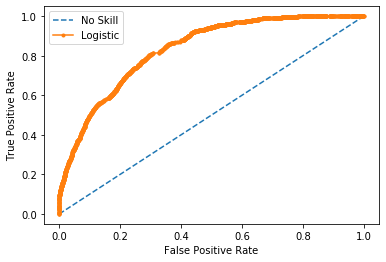

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
lr_proba = lr.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_proba = [0 for _ in range(len(y_test))]
 
# keep probabilities for the positive outcome only
lr_proba = lr_proba[:, 1]
 
# calculate scores
lr_auc = roc_auc_score(y_test, lr_proba)
ns_auc = roc_auc_score(y_test, ns_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

### city hotel 

In [9]:
ml_city_data = pd.read_csv('data/ml_city_data.csv',index_col=0)
ml_city_data.head()

,is_canceled,lead_time,Direct(bool),precancel(bool),prebook(bool),change_room(bool),reserve_change(bool),parkinglot(bool),special_request(bool),customer_type(label),Contract,Group,Transient,Transient-Party
0,0,6,0.0,0,0,0,0,0.0,0.0,2,0,0,1,0
1,1,88,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0
2,1,65,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0
3,1,92,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0
4,1,100,0.0,0,0,0,0,0.0,1.0,2,0,0,1,0


In [10]:
label = ml_city_data['is_canceled']
feature = ml_city_data.drop(['is_canceled','customer_type(label)',"Contract"], axis=1)

In [11]:
label.shape, feature.shape

((79330,), (79330, 12))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(feature)
data_scaled

array([[0.00953895, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.13990461, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10333863, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.05405405, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.17329094, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.32591415, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_scaled,label,test_size=0.2, stratify=label,random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
# 모델을 인스턴스화
lr =LogisticRegression(
    penalty='l2',  # l1 규제는 liblinear/ saga가 support
    C=10,         # 알파의 역수
    class_weight='balanced', 
    random_state=1,
    #solver='liblinear',  
    #solver='saga',
    #solver='lbfgs'
    solver = 'newton-cg'
)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

print("정확도:", accuracy_score(y_test,y_pred))
print("재현율:", recall_score(y_test,y_pred))
print("정밀도:", precision_score(y_test,y_pred))
print("f1점수:", f1_score(y_test,y_pred))
print("roc_auc점수:", roc_auc_score(y_test,y_pred))

정확도: 0.7587293583764023
재현율: 0.7253776435045317
정밀도: 0.7049324721080447
f1점수: 0.7150089338892198
roc_auc점수: 0.7539931695783528


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.840


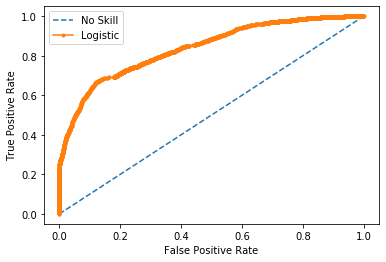

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# predict probabilities
lr_proba = lr.predict_proba(X_test)

# generate a no skill prediction (majority class)
ns_proba = [0 for _ in range(len(y_test))]
 
# keep probabilities for the positive outcome only
lr_proba = lr_proba[:, 1]
 
# calculate scores
lr_auc = roc_auc_score(y_test, lr_proba)
ns_auc = roc_auc_score(y_test, ns_proba)
 
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
 
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_proba)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
 
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
# show the legend
plt.legend()
 
# show the plot
plt.show()

In [17]:
lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [18]:
print("roc_auc점수:", roc_auc_score(y_test,lr_probs))

roc_auc점수: 0.8400761691346237


# ------------------------------------------------